In [2]:
import pandas as pd
import seaborn as sns
from scipy import stats
import scipy
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from scipy.stats import chi2_contingency
from statannot import add_stat_annotation
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [3]:
df = pd.read_excel('./교육통계데이터_2022_최종_교사수전체포함.xlsx')

In [4]:
df.head()

,연도,시도,행정구역,학제,학교수,학생수_전체,학생수_남,학생수_여,교사수,입학자_전체,입학자_남,입학자_여,학업중단자_전체,학업중단자_남,학업중단자_여,교사수_전체
0,2022,서울,종로구,고등학교,14,7589,4080,3509,11,2505,1337,1168,158,78,80,666
1,2022,서울,종로구,일반고,7,3584,2039,1545,6,1141,631,510,63,26,37,327
2,2022,서울,종로구,특목고,3,1878,629,1249,1,645,212,433,34,10,24,172
3,2022,서울,종로구,특성화고,3,1298,583,715,3,461,236,225,44,25,19,124
4,2022,서울,중구,고등학교,11,5547,2963,2584,5,1770,916,854,150,96,54,498


In [5]:
# 학제 카테고리를 고등학교로만 분류한다
df_hs = df[df['학제'] == '고등학교']

In [6]:
# 상담교사수를 시도별로 그룹화한다
teacher_num = df_hs.groupby('시도')['교사수'].sum()

In [7]:
teacher_num = teacher_num.to_frame()

In [8]:
# 전체 교사수를 시도별로 그룹화한다
T_teacher_num = df_hs.groupby('시도')['교사수_전체'].sum()

In [9]:
T_teacher_num = T_teacher_num.to_frame()

In [10]:
# 학교수를 시도별로 그룹화한다
school_num = df_hs.groupby('시도')['학교수'].sum()

In [11]:
school_num = school_num.to_frame()

In [12]:
# 전체 학업중단자수를 시도별로 그룹화한다
q_student_num = df_hs.groupby('시도')['학업중단자_전체'].sum()

In [13]:
q_student_num = q_student_num.to_frame()

In [14]:
# 전체 학생수를 시도별로 그룹화한다
student_num = df_hs.groupby('시도')['학생수_전체'].sum()

In [15]:
student_num = student_num.to_frame()

In [16]:
# 하나의 데이터프레임으로 묶기 위해 병합하는 과정을 진행한다
df1 = pd.merge(teacher_num, school_num, on = '시도')

In [17]:
# 하나의 데이터프레임으로 묶기 위해 병합하는 과정을 진행한다
df2 = pd.merge(T_teacher_num, q_student_num, on = '시도')

In [18]:
df_num = pd.concat([df1, student_num, df2], axis = 1)
df_num = df_num.sort_values(by='교사수', ascending=False)
df_num

,교사수,학교수,학생수_전체,교사수_전체,학업중단자_전체
시도,,,,,
경기,243,486,340895,26222,5640
서울,169,320,207388,15731,3412
전남,72,144,44913,4496,738
부산,71,142,70161,5569,1056
경남,67,190,84613,6910,1104
경북,66,185,62986,5602,1060
인천,61,127,71760,6249,1093
충남,57,117,56081,4693,970
전북,52,133,48265,4403,765


In [19]:
# 상담교사 비율 컬럼을 새로 만들어 교사수 전체에서 상담교사가 차지하는 비율을 구함
df_num['상담교사 비율'] = round((df_num['교사수'] / df_num['교사수_전체'] * 100), 2)

In [20]:
# 학업중단자 비율 컬럼을 새로 만들어 전체 학생수에서 학업중단자가 차지하는 비율을 구함
df_num['학업중단자 비율'] = round((df_num['학업중단자_전체'] / df_num['학생수_전체'] * 100), 2)

In [21]:
df_num

,교사수,학교수,학생수_전체,교사수_전체,학업중단자_전체,상담교사 비율,학업중단자 비율
시도,,,,,,,
경기,243,486,340895,26222,5640,0.93,1.65
서울,169,320,207388,15731,3412,1.07,1.65
전남,72,144,44913,4496,738,1.60,1.64
부산,71,142,70161,5569,1056,1.27,1.51
경남,67,190,84613,6910,1104,0.97,1.30
경북,66,185,62986,5602,1060,1.18,1.68
인천,61,127,71760,6249,1093,0.98,1.52
충남,57,117,56081,4693,970,1.21,1.73
전북,52,133,48265,4403,765,1.18,1.58


# 학업중단자수와 교사수의 정규분포도

<Axes: xlabel='교사수', ylabel='Density'>

C:\Users\big-03-06\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\big-03-06\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


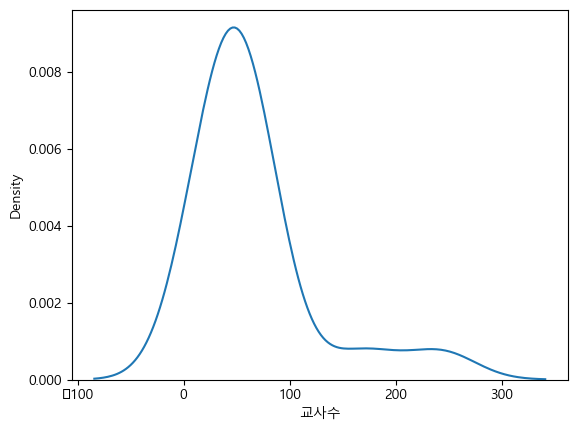

In [22]:
# 교사수 비율의 정규 분포도 -> 왼쪽으로 치우치는 경향이 있어서 log2 적용
sns.kdeplot(df_num['교사수'])

In [23]:
df_num['교사수_log2']  = np.log2(df_num['교사수']) 

<Axes: xlabel='교사수_log2', ylabel='Density'>

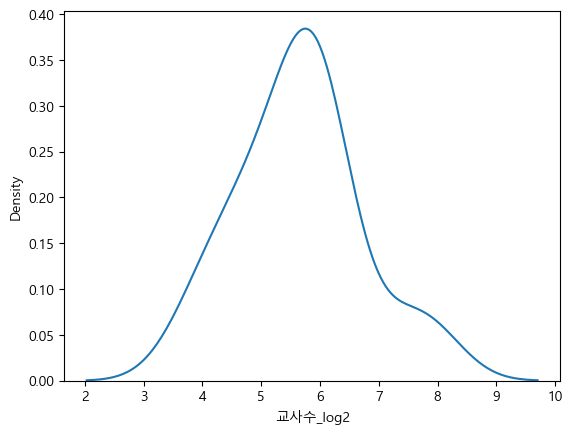

In [24]:
sns.kdeplot(df_num['교사수_log2'])

<Axes: xlabel='학업중단자_전체', ylabel='Density'>

C:\Users\big-03-06\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\big-03-06\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


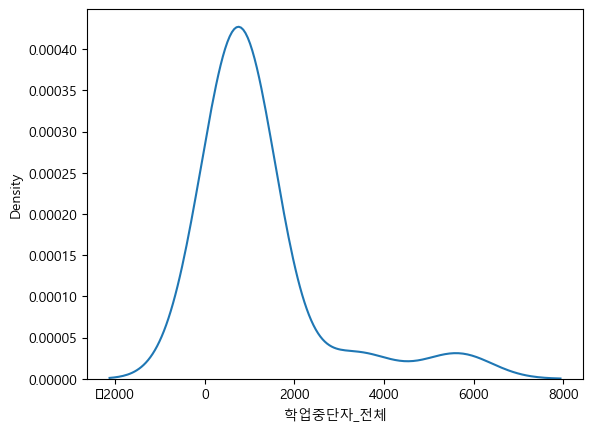

In [25]:
# 학업중단자 수의 정규분포도
sns.kdeplot(df_num['학업중단자_전체'])

In [26]:
df_num['학업중단자_전체_log2']  = np.log2(df_num['학업중단자_전체']) 

<Axes: xlabel='학업중단자_전체_log2', ylabel='Density'>

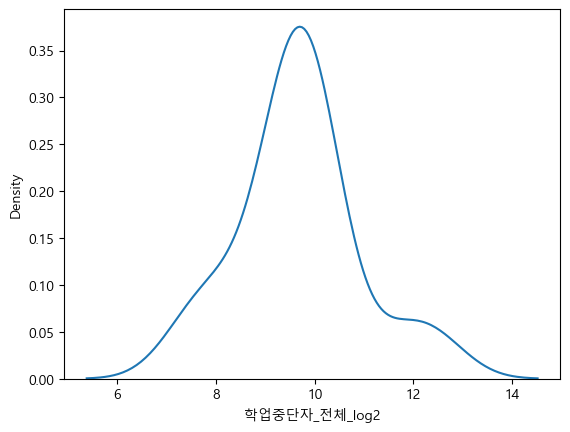

In [27]:
sns.kdeplot(df_num['학업중단자_전체_log2'])

# 학업중단자 비율과 교사수 비율의 정규분포도

In [28]:
df_num['상담교사 비율_log2']  = np.log2(df_num['상담교사 비율']) 

<Axes: xlabel='상담교사 비율_log2', ylabel='Density'>

C:\Users\big-03-06\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\big-03-06\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


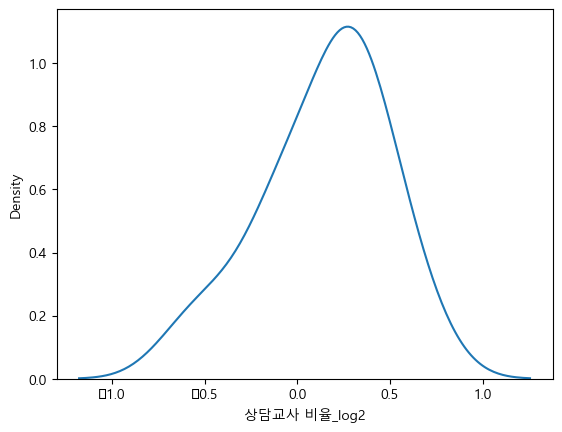

In [29]:
sns.kdeplot(df_num['상담교사 비율_log2'])

In [30]:
# 전문상담교사 배치율의 정규분포도

In [31]:
df_num['학업중단자 비율_exp']  = np.exp(df_num['학업중단자 비율']) 

<Axes: xlabel='학업중단자 비율_exp', ylabel='Density'>

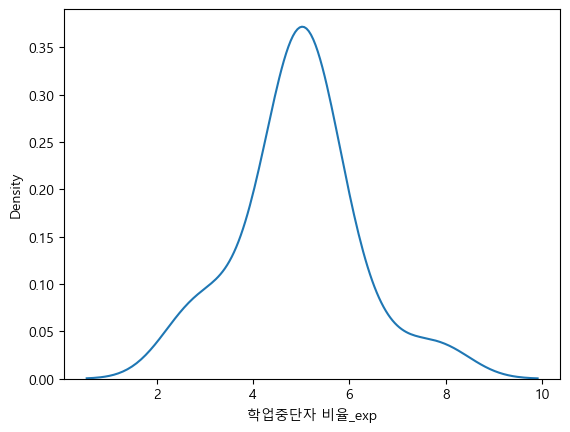

In [32]:
sns.kdeplot(df_num['학업중단자 비율_exp'])

In [33]:
# 학업중단자 비율의 정규분포도

# 통계분석 결과

In [34]:
# 상담 교사수와 학업중단자수의 피어슨 분석 결과
# 피어슨 검정 왼쪽에 있는 값 = 피어슨 상관계수 양수면 상관관계 있음 음수면 없음
scipy.stats.pearsonr(df_num['학업중단자_전체'], df_num['교사수'])

PearsonRResult(statistic=0.980349465309231, pvalue=5.496966530837192e-12)

In [35]:
# 상담교사 비율과 학업중단자 비율의 피어슨 분석 결과
scipy.stats.pearsonr(df_num['상담교사 비율_log2'], df_num['학업중단자 비율_exp'])

PearsonRResult(statistic=0.3045738591648005, pvalue=0.23458147964199658)

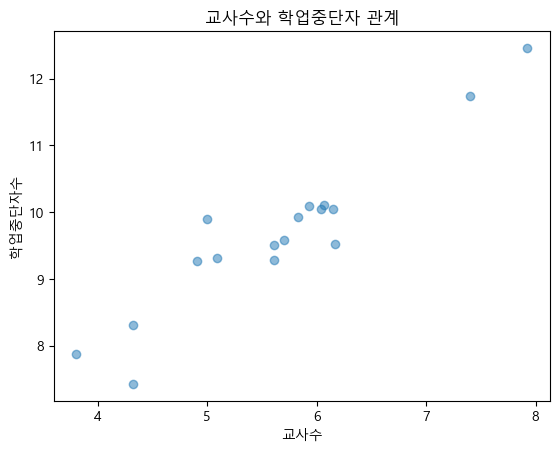

In [36]:
# 상담교사수와 학업중단자의 산점도 그래프
plt.scatter(df_num['교사수_log2'], df_num['학업중단자_전체_log2'], alpha=0.5)
plt.title('교사수와 학업중단자 관계')
plt.xlabel('교사수')
plt.ylabel('학업중단자수')
plt.show()

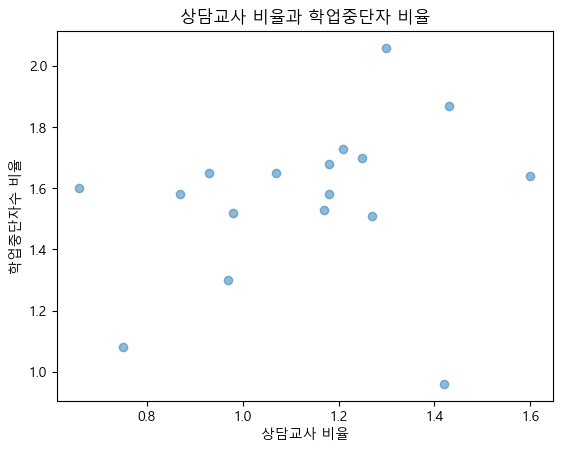

In [37]:
# 상담교사 비율과 학업중단자 비율의 산점도 그래프
plt.scatter(df_num['상담교사 비율'], df_num['학업중단자 비율'], alpha=0.5)
plt.title('상담교사 비율과 학업중단자 비율')
plt.xlabel('상담교사 비율')
plt.ylabel('학업중단자수 비율')
plt.show()